In [10]:
!pip install scikit-learn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 820.8 kB/s eta 0:00:001m815.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 8.0 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 8.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
import tensorflow as tf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
print(tf.__version__)
print(f"NoteBook last run:{datetime.datetime.now()}")

2024-04-17 23:57:34.998033: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 23:57:35.264622: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 23:57:36.861661: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 23:57:39.294288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1
NoteBook last run:2024-04-17 23:57:43.739161


In [2]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=200,noise=0.03,random_state=42)


In [3]:
circle=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circle

,X0,X1,label
0,0.933815,-0.321662,0
1,0.597980,0.808796,0
2,-0.285998,0.916563,0
3,-0.724305,-0.362209,1
4,-0.173960,0.827350,1
...,...,...,...
195,0.732364,0.282096,1
196,0.612566,0.754158,0
197,0.801224,-0.461214,0
198,0.210660,-0.777414,1


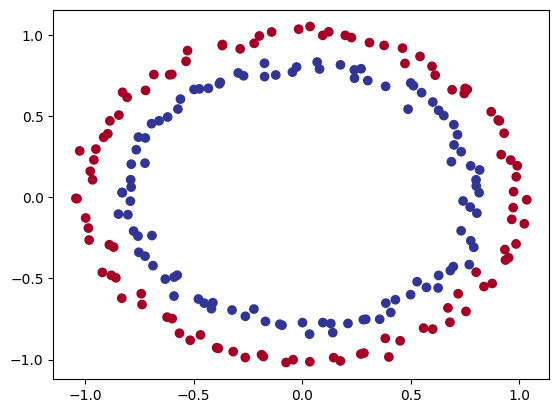

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [10]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [11]:
tf.random.set_seed(42)
model_test_1=tf.keras.Sequential([tf.keras.layers.Dense(1),
                                tf.keras.layers.Dense(1)
                               ])
model_test_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=['accuracy'])
model_test_1.fit(X,y,epochs=200,verbose=0)
model_test_1.evaluate(X,y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 7.8397  


[8.059048652648926, 0.5]

In [13]:
tf.random.set_seed(42)
model_test_2=tf.keras.Sequential([
                                tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1)
                               ])
model_test_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])
model_test_2.fit(X,y,epochs=100,verbose=0)
model_test_2.evaluate(X,y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.2660  


[0.2697322964668274, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


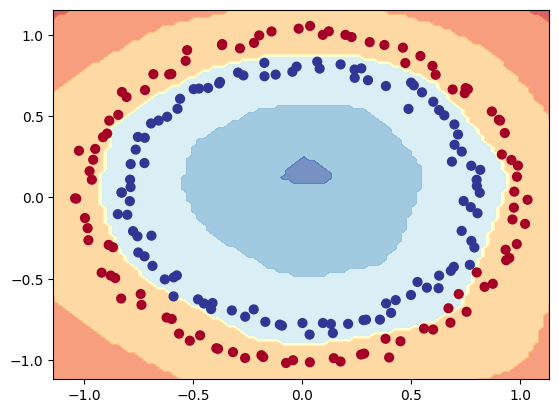

In [14]:
plot_decision_boundary(model_test_2,X,y)

In [15]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((200, 2), (0, 2))